<a href="https://colab.research.google.com/github/spctr01/Customer-propensity-to-churn-Prediction/blob/master/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [71]:
data = pd.read_csv('churn_prediction.csv', error_bad_lines=False)
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [55]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


# **Data Exploration**

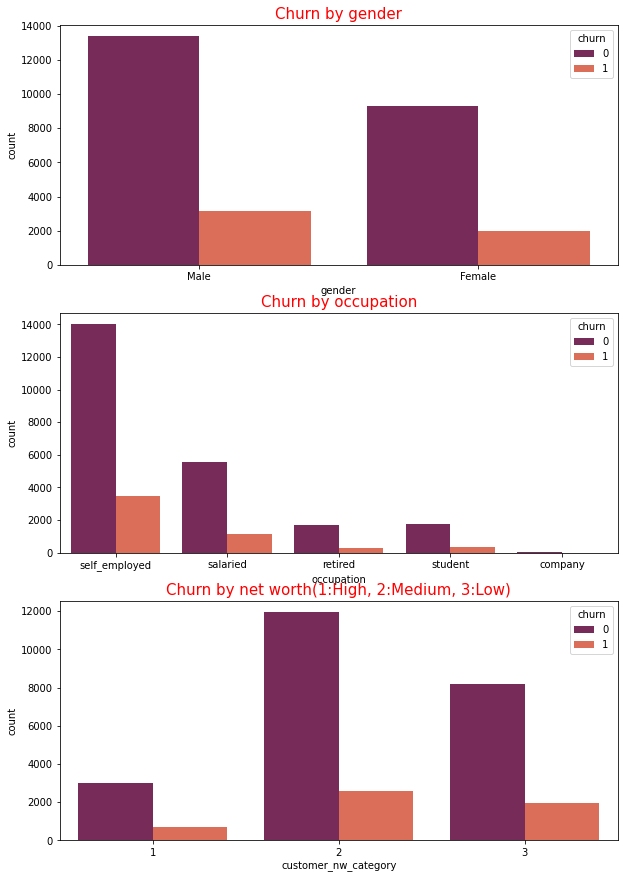

In [50]:
fig , ax = plt.subplots(3,1, figsize = (10,15))

ax[0].set_title('Churn by gender', color='red', fontsize=15)
sns.countplot('gender', data=data, hue='churn', palette='rocket', ax=ax[0])

ax[1].set_title('Churn by occupation', color='red', fontsize=15)
sns.countplot('occupation', data=data, hue='churn', palette='rocket', ax=ax[1])

ax[2].set_title('Churn by net worth(1:High, 2:Medium, 3:Low)', color='red', fontsize=15)
sns.countplot('customer_nw_category', data=data, hue='churn', palette='rocket', ax=ax[2])

In [54]:
print(data.shape)
#checking for balance of data 
# we can see that data is inbalanced 
#(resampling  the data can be done & choosing various evalution matrix as Accuracy is not right in this case)
data['churn'].value_counts()

(28382, 21)


0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [6]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [72]:
#null values in the dataset
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# **Imputing missing values**

In [73]:
#filling gender, occupation, days_since_last_transaction, city with mode & dependents with mean
data['gender'].fillna(data['gender'].mode()[0], inplace= True)
data['city'].fillna(data['city'].mode()[0], inplace= True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace= True)
data['dependents'].fillna(data['dependents'].mean(), inplace= True)
data['days_since_last_transaction'].fillna(data['days_since_last_transaction'].mode()[0], inplace= True)





# **Split the Data**

In [76]:
#split data to tarin and test tests
from sklearn.model_selection import train_test_split


x =data.drop('churn', axis = 1)
y =data['churn']
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2)


# **Encoding **

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

enc = OneHotEncoder()
cat_features = ['gender', 'occupation']
transform = ColumnTransformer([('1hot',
                                enc,
                                cat_features)],
                              remainder = 'passthrough')
x_train_transformed_data = transform.fit_transform(x_train)
x_test_transformed_data = transform.fit_transform(x_test)


#it is converted to numpy array so convert it to pandas dataframe 
train_data = pd.DataFrame(x_train_transformed_data)
test_data = pd.DataFrame(x_test_transformed_data)

train_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7139.0,3947.0,37.0,0.000000,1084.0,2.0,540.0,231.0,1584.74,1584.74,1584.74,1574.75,0.04,0.04,0.04,0.04,1584.74,1584.74
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22010.0,1149.0,41.0,0.000000,1096.0,3.0,329.0,0.0,6002.97,6002.97,5691.14,3889.63,0.49,0.49,0.49,0.49,6002.97,6002.97
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2989.0,3988.0,51.0,0.000000,1020.0,1.0,455.0,9.0,1972.32,1400.32,1453.99,2867.97,572.67,0.84,0.67,2.10,1558.43,1401.18
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18310.0,952.0,90.0,0.347236,649.0,1.0,554.0,6.0,24488.20,8059.63,9192.63,17781.12,32857.53,0.39,16428.96,0.39,11458.64,8059.63
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,26372.0,545.0,43.0,0.000000,1180.0,3.0,1330.0,9.0,8489.66,1346.80,2167.82,1340.23,14285.99,0.27,7143.13,0.27,3809.85,1346.80


In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_data, y_train)
model.score(test_data, y_test)

0.8356526334331513